<h2>FIN5615 Project #5
    <p class="text-primary">Black Scholes Options Pricing (Part II)</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    The goal of this project is to build an options pricing calculator using the Black-Scholes pricing model. Our calculator will be able to price both put and call options as well as the following set of Greeks: delta, gamma, theta, vega, and rho. 
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from one task informing work in later tasks. Include all code used to produce your results, and support your answers with textual explanations if neccessary. <b>Any written text must be typed in a markdown cell to receive credit!</b> You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Project_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body">
    Recall from the previous project, we coded the function <code>black_scholes_formula(stock_price, strike, term, rf, volatility, option, dividend = 0.)</code>, which returned the price of either a call or put option depending on the value of the input parameter <code>option</code>.
    <br><br>Write another function called <code>black_scholes_greeks</code> that takes in the same input parameters as <code>black_scholes_formula</code>, and calculates the option's greeks (delta, gamma, vega, theta, and rho) according to the below table:
    <br><br>
        
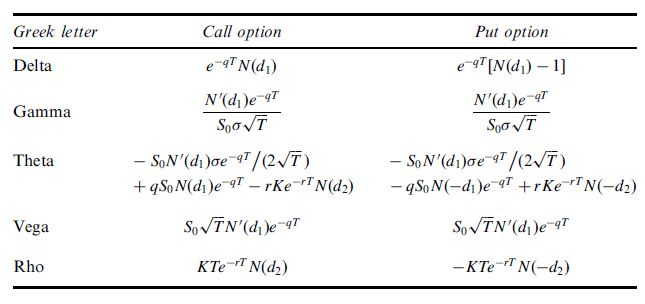
    <br><br>Note that $N^{\prime}(x)$ is simply the probability density function of the normal distribution.
    <br><br>The output should be returned in the form of <b>dictionary</b> with the following keys: <code>delta</code>, <code>gamma</code>, <code>vega</code>, <code>theta</code>, <code>rho</code>, each storing the corresponding greek value for the option. Run <code>black_scholes_greeks</code> on a call option where:
    <ul>
        <li><code>stock_price</code> = \$30</li>
        <li><code>strike</code> = \$35</li>
        <li><code>term</code> = 6 months</li>
        <li><code>rf</code> = 1%</li>
        <li><code>volatility</code> = 0.2</li>
        <li><code>dividend</code> = 2.5%</li>
    </ul>
    </div>
</div>

### Q.No.1 Write another function called black_scholes_greeks that takes in the same input parameters as black_scholes_formula, and calculates the option's greeks (delta, gamma, vega, theta, and rho) according to the below table:
### Answer:

In [45]:
# Define the function to calculate the option's Greeks
def black_scholes_greeks(stock_price, strike, term, rf, volatility, option, dividend=0):
    
    # Calculating d1 and d2
    d1 = (np.log(stock_price / strike) + (rf - dividend + 0.5 * volatility ** 2) * term) / (volatility * np.sqrt(term))
    d2 = d1 - volatility * np.sqrt(term)
    
    # Initialize Greeks to None (to handle the case where the option type is invalid)
    delta = gamma = theta = vega = rho = None

    # Calculating Option's Greeks based on the option type
    if option == 'call':
        delta = np.exp(-dividend * term) * norm.cdf(d1)
        gamma = (norm.pdf(d1) * np.exp(-dividend * term)) / (stock_price * volatility * np.sqrt(term))
        theta = (-((stock_price * norm.pdf(d1) * volatility * np.exp(-dividend * term)) / (2 * np.sqrt(term))) 
                 + dividend * stock_price * norm.cdf(d1) * np.exp(-dividend * term)
                 - rf * strike * np.exp(-rf * term) * norm.cdf(d2))
        vega = stock_price * np.sqrt(term) * norm.pdf(d1) * np.exp(-dividend * term)
        rho = strike * term * np.exp(-rf * term) * norm.cdf(d2)
    elif option == 'put':
        delta = np.exp(-dividend * term) * (norm.cdf(d1) - 1)
        gamma = (norm.pdf(d1) * np.exp(-dividend * term)) / (stock_price * volatility * np.sqrt(term))
        theta = (-((stock_price * norm.pdf(d1) * volatility * np.exp(-dividend * term)) / (2 * np.sqrt(term))) 
                 + dividend * stock_price * norm.cdf(-d1) * np.exp(-dividend * term)
                 - rf * strike * np.exp(-rf * term) * norm.cdf(-d2))
        vega = stock_price * np.sqrt(term) * norm.pdf(d1) * np.exp(-dividend * term)
        rho = -strike * term * np.exp(-rf * term) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    # Return the calculated Greeks as a dictionary
    return {
        'delta': delta,
        'gamma': gamma,
        'rho':   rho,
        'theta': theta,
        'vega': vega
    }


In [47]:
# Running the black_scholes_greeks function on a call option with a given parameters
greeks_call_option = black_scholes_greeks(
    stock_price=30,
    strike=35,
    term=0.5,        # 6 months in years
    rf=0.01,         # 1% risk-free rate
    volatility=0.2,  # Volatility of 20%
    option='call',   
    dividend=0.025   # 2.5% dividend yield
)

# Displaying the calculated Greeks
print(greeks_call_option)


{'delta': 0.14002412854910162, 'gamma': 0.05225745967362611, 'rho': 1.957553740472613, 'theta': -0.8747672525228961, 'vega': 4.703171370626351}


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    Modify the function <code>black_scholes_formula</code> to take in a <b>boolean</b> input parameter called <code>greeks</code> that can be either <code>True</code> or <code>False</code>, a default value of <code>False</code>.
    <br><br>If <code>greeks</code> is <code>True</code>, then in addition to producing the price of a call / put option, <code>black_scholes_formula</code> will also calculate the greeks of the option by calling the function <code>black_scholes_greeks</code> (<b><u>do not</u></b> code the formulas for the greeks again), and return the delta, gamma, vega, theta, and rho as a dictionary, in addition to the price of the option.
    <br><br>If <code>greeks</code> is <code>False</code>, then simply return the price of the option just like before. Run <code>black_scholes_formula</code> to price of a call option where:
    <ul>
        <li><code>stock_price</code> = \$30</li>
        <li><code>strike</code> = \$35</li>
        <li><code>term</code> = 6 months</li>
        <li><code>rf</code> = 1%</li>
        <li><code>volatility</code> = 0.2</li>
        <li><code>dividend</code> = 2.5%</li>
        <li><code>greeks</code> = True</li>
    </ul>
    Your function should return an output like this:
        
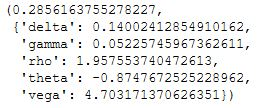
    </div>
</div>

### Q.No.2 Modify the function black_scholes_formula to take in a boolean input parameter called greeks that can be either True or False, a default value of False.
### Answer:

In [51]:

# Define the modified black_scholes_formula function
def black_scholes_formula(stock_price, strike, term, rf, volatility, option, dividend=0, greeks=False):
    # Calculate d1 and d2
    d1 = (np.log(stock_price / strike) + (rf - dividend + 0.5 * volatility ** 2) * term) / (volatility * np.sqrt(term))
    d2 = d1 - volatility * np.sqrt(term)
    
    # Calculate option price
    if option == 'call':
        price = stock_price * np.exp(-dividend * term) * norm.cdf(d1) - strike * np.exp(-rf * term) * norm.cdf(d2)
    elif option == 'put':
        price = strike * np.exp(-rf * term) * norm.cdf(-d2) - stock_price * np.exp(-dividend * term) * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    # If greeks is True, calculating the Greeks and returning both price and Greeks
    if greeks:
        greeks_values = black_scholes_greeks(stock_price, strike, term, rf, volatility, option, dividend) # As instructed greek formula is not coded, here I called the greek values if greek is True
        return price, greeks_values
    
    # Otherwise, returning only the option price
    return price


In [53]:
# Running the black_scholes function on a call option with a given parameters
result = black_scholes_formula(
    stock_price=30,
    strike=35,
    term=0.5,         # 6 months in years
    rf=0.01,          # 1% risk-free rate
    volatility=0.2,   # 20% volatility
    option='call',
    dividend=0.025,   # 2.5% dividend yield
    greeks=True       # Calculate Greeks
)

print(result)

(0.2856163755278227, {'delta': 0.14002412854910162, 'gamma': 0.05225745967362611, 'rho': 1.957553740472613, 'theta': -0.8747672525228961, 'vega': 4.703171370626351})


In [55]:

# For Verification let's test if code return only price if greeks is false?

result = black_scholes_formula(
    stock_price=30,
    strike=35,
    term=0.5,         # 6 months in years
    rf=0.01,          # 1% risk-free rate
    volatility=0.2,   # 20% volatility
    option='call',
    dividend=0.025,   # 2.5% dividend yield
    greeks=False       # Calculate Greeks
)

print(result) 

0.2856163755278227


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    One of the assumptions to the Black-Scholes pricing model is that the risk-free interest rate is constant. However in practice, interest rates should follow a term structure, such as the spot curve.
    <br><br>Assume that the spot curve follows the below formula:
    <br><br>
    $$r(t) = \beta_0 + \beta_1\left(\frac{1 - e^{-\alpha t}}{\alpha t}\right) + \beta_2\left(\frac{1 - e^{-\alpha t}}{\alpha t} - e^{-\alpha t}\right)$$
    <br>Note that resulting $r(t)$ is expressed as a percentage. Set the parameters equal to the following values:
    <ul>
        <li>$\alpha = .7143$</li>
        <li>$\beta_0 = 2.99$</li>
        <li>$\beta_1 = -2.70$</li>
        <li>$\beta_2 = -2.12$</li>
    </ul>
    <br>Next:
    <ul>
        <li>Write a function that takes in <code>term</code> as an input parameter, then calculates and returns the spot rate according to the formula above.</li>
        <li>Plot the spot curve for terms ranging from 1 quarter to 30 years in quarterly increments on a line plot. Provide axis labels and a title for the plot. Your final plot should look something like this:</li>
        
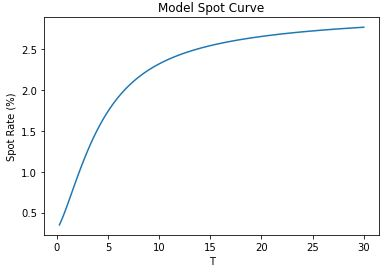
        <li>Comment on the shape and reasonableness of this calculated spot curve. </li>
    </ul>
    </div>
</div>

### Q.No.3.1 Write a function that takes in term as an input parameter, then calculates and returns the spot rate according to the formula above.
### Answer:

In [59]:
# Given Parameters
alpha = 0.7143
beta_0 = 2.99
beta_1 = -2.70
beta_2 = -2.12

# Define the spot rate function based on the formula
def spot_rate(term):
    # Calculating each components of the formula
    term_factor = (1 - np.exp(-alpha * term)) / (alpha * term)
    rate = beta_0 + beta_1 * term_factor + beta_2 * (term_factor - np.exp(-alpha * term))
    return rate

# Generate the terms from 0.25 years to 30 years in quarterly increments
terms = np.arange(0.25, 30.25, 0.25)

# Calculate the spot rates for each term
spot_rates = [round(spot_rate(term),3) for term in terms]

print(spot_rates[:10])  # first 10 spot rates to check the result
print (len(spot_rates))
print (len(terms))


[0.349, 0.42, 0.499, 0.583, 0.67, 0.758, 0.846, 0.933, 1.017, 1.099]
120
120


### Q.No.3.2 Plot the spot curve for terms ranging from 1 quarter to 30 years in quarterly increments on a line plot. Provide axis labels and a title for the plot.
### Answer:

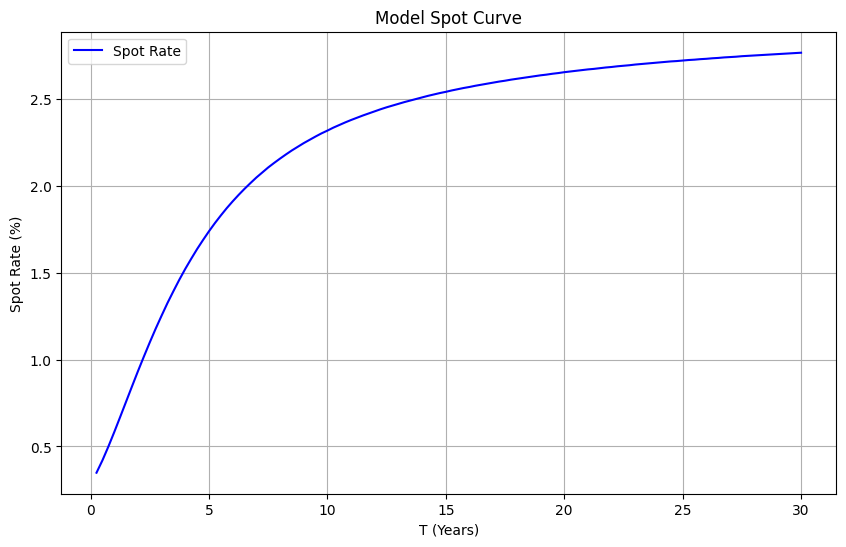

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(terms, spot_rates, label="Spot Rate", color="blue")
plt.title("Model Spot Curve")
plt.xlabel("T (Years)")
plt.ylabel("Spot Rate (%)")
plt.legend ()
plt.grid(True)
plt.show()

### Q.No.3.3 Comment on the shape and reasonableness of this calculated spot curve.
### Answer:

**Comments:**
The calculated spot curve shows an upward slope that flattens over time. This shape is typical and reasonable—it suggests that shorter-term rates are lower, while longer-term rates stabilize as market expectations even out. This reflects a normal interest rate environment, where investors expect higher returns for longer commitments, but rates level off as they factor in long-term economic stability.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Modify the function <code>black_scholes_formula</code> to use the spot rate outputted from the function in the previous task as the appropriate risk-free rate in our Black-Scholes formula based on the term of the options contract.
    <br><br>Note that this means <code>rf</code> will no longer be an input to the <code>black_scholes_formula</code> function. Run <code>black_scholes_formula</code> to price the following options:
    <ul>
        <li>A call option where the stock price is \$30, strike is \$35, term is 9 months, volatility is 20%, that also pays a 2.5% annual dividend, with <code>greeks</code> set to <code>True</code>. Check that your function prices this option at approximately \$0.4822.</li>
        <li>A put option where the stock price is \$35, strike is \$30, term is 2 years, volatility is 20%, that also pays a 2.5% annual dividend, with <code>greeks</code> set to <code>True</code>. Check that your function prices this option at approximately \$1.9289.</li>
    </ul>
    </div>
</div>

### Q.No. 4.0 Defining the function:
### Answer:

In [68]:

# Definining the spot rate function as in the previous task
def spot_rate(term):
    term_factor = (1 - np.exp(-alpha * term)) / (alpha * term)
    rate = beta_0 + beta_1 * term_factor + beta_2 * (term_factor - np.exp(-alpha * term))
    return rate / 100  # Convert rate from percentage to decimal for calculations

# Definining  the modified black_scholes_formula function
def black_scholes_formula(stock_price, strike, term, volatility, option, dividend=0, greeks=False): 
    
    # Calculate the risk-free rate based on the term
    rf = spot_rate(term)
    
    # Calculate d1 and d2
    d1 = (np.log(stock_price / strike) + (rf - dividend + 0.5 * volatility ** 2) * term) / (volatility * np.sqrt(term))
    d2 = d1 - volatility * np.sqrt(term)
    
    # Calculate option price
    if option == 'call':
        price = stock_price * np.exp(-dividend * term) * norm.cdf(d1) - strike * np.exp(-rf * term) * norm.cdf(d2)
    elif option == 'put':
        price = strike * np.exp(-rf * term) * norm.cdf(-d2) - stock_price * np.exp(-dividend * term) * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    # If greeks is True, calculating the Greeks and returning both price and Greeks
    if greeks:
        greeks_values = black_scholes_greeks(stock_price, strike, term, rf, volatility, option, dividend)
        return price, greeks_values
    
    # Otherwise, returning only the option price
    return price

# Define the black_scholes_greeks function to calculate the Greeks
def black_scholes_greeks(stock_price, strike, term, rf, volatility, option, dividend=0):
    d1 = (np.log(stock_price / strike) + (rf - dividend + 0.5 * volatility ** 2) * term) / (volatility * np.sqrt(term))
    d2 = d1 - volatility * np.sqrt(term)
    
    if option == 'call':
        delta = np.exp(-dividend * term) * norm.cdf(d1)
        gamma = (norm.pdf(d1) * np.exp(-dividend * term)) / (stock_price * volatility * np.sqrt(term))
        theta = (-((stock_price * norm.pdf(d1) * volatility * np.exp(-dividend * term)) / (2 * np.sqrt(term))) 
                 + dividend * stock_price * norm.cdf(d1) * np.exp(-dividend * term)
                 - rf * strike * np.exp(-rf * term) * norm.cdf(d2))
        vega = stock_price * np.sqrt(term) * norm.pdf(d1) * np.exp(-dividend * term)
        rho = strike * term * np.exp(-rf * term) * norm.cdf(d2)
    elif option == 'put':
        delta = np.exp(-dividend * term) * (norm.cdf(d1) - 1)
        gamma = (norm.pdf(d1) * np.exp(-dividend * term)) / (stock_price * volatility * np.sqrt(term))
        theta = (-((stock_price * norm.pdf(d1) * volatility * np.exp(-dividend * term)) / (2 * np.sqrt(term))) 
                 - dividend * stock_price * norm.cdf(-d1) * np.exp(-dividend * term)
                 + rf * strike * np.exp(-rf * term) * norm.cdf(-d2))
        vega = stock_price * np.sqrt(term) * norm.pdf(d1) * np.exp(-dividend * term)
        rho = -strike * term * np.exp(-rf * term) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return {
        'delta': delta,
        'gamma': gamma,
        'vega': vega,
        'theta': theta,
        'rho': rho
    }

### Q.No.4.1 A call option where the stock price is 30, strike is 35, term is 9 months, volatility is 20%, that also pays a 2.5% annual dividend, with greeks set to True. Check that your function prices this option at approximately $0.4822.
### Answer:

In [71]:

# Checking the  Call option Price stays at $0.4822
call_option_price, call_option_greeks = black_scholes_formula(
    stock_price=30,
    strike=35,
    term=9/12,       # 9 months in years
    volatility=0.2,  # 20% volatility
    option='call',
    dividend=0.025,  # 2.5% dividend yield
    greeks=True      # Calculate Greeks
)
print("Call Option Price:", call_option_price)
print("Call Option Greeks:", call_option_greeks)



Call Option Price: 0.48218332751282755
Call Option Greeks: {'delta': 0.18325689060721748, 'gamma': 0.05070746895955708, 'vega': 6.845508309540205, 'theta': -0.8003244109498754, 'rho': 3.7616425430277722}


### Q.No.4.2 A put option where the stock price is 35, strike is 30, term is 2 years, volatility is 20%, that also pays a 2.5% annual dividend, with greeks set to True. Check that your function prices this option at approximately 1.9289.
### Answer:

In [74]:
# Checking the  Call option Price stays at $1.9289
put_option_price, put_option_greeks = black_scholes_formula(
    stock_price=35,
    strike=30,
    term=2,          # 2 years
    volatility=0.2,  # 20% volatility
    option='put',
    dividend=0.025,  # 2.5% dividend yield
    greeks=True      # Calculate Greeks
)
print("Put Option Price:", put_option_price)
print("Put Option Greeks:", put_option_greeks)


Put Option Price: 1.928873211758626
Put Option Greeks: {'delta': -0.2686684112582906, 'gamma': 0.03248168051657731, 'vega': 15.91602345312288, 'theta': -0.9251949038785192, 'rho': -22.664535211597595}


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    On June 30th, 2020, the AAPL's stock price was valued at \$364.14 and paying a dividend yield of 0.9%. On that same day, a call option on AAPL with a strike of \$380, expiring in 6-months was trading at \$26.
    <br><br>Estimate the implied volatility on this call option using the bisection method with a tolerance of $0.001 on the error of the calculated Black-Scholes call option price. Set <code>option</code> to <code>call</code> and <code>greeks</code> to <code>False</code> when calling the function <code>black_scholes_formula</code>.
    <br><br>Your final estimated implied volatility should be approximately 0.3228.
    </div>
</div>

### Q.No.5 Estimate the implied volatility on this call option using the bisection method with a tolerance of $0.001 on the error of the calculated Black-Scholes call option price. Set option to call and greeks to False when calling the function black_scholes_formula.
### Answer:

In [78]:
# Given data
market_price = 26  
stock_price = 364.14  # AAPL stock price on June 30th, 2020
strike = 380  
term = 6 / 12  # 6 months to expiration
dividend_yield = 0.009  # 0.9% dividend yield
tolerance = 0.001  # Tolerance for price difference

# Bisection method to find implied volatility
def implied_volatility_bisection(stock_price, strike, term, dividend_yield, market_price, tolerance):
    lower_bound = 0.01  # Starting lower bound for volatility
    upper_bound = 1.0   # Starting upper bound for volatility

    while upper_bound - lower_bound > tolerance:
        mid_vol = (lower_bound + upper_bound) / 2
        # Calculate the option price with the midpoint volatility
        price = black_scholes_formula(
            stock_price=stock_price,
            strike=strike,
            term=term,
            volatility=mid_vol,
            option='call',
            dividend=dividend_yield,
            greeks=False
        )

        # Checking if the calculated price is close to the market price within the tolerance
        if abs(price - market_price) < tolerance:
            return mid_vol
        elif price < market_price:
            lower_bound = mid_vol  # Implies we need higher volatility
        else:
            upper_bound = mid_vol  # Implies we need lower volatility

    # Returning the best estimate of volatility
    return (lower_bound + upper_bound) / 2

# Calculating implied volatility
implied_volatility = implied_volatility_bisection(stock_price, strike, term, dividend_yield, market_price, tolerance)
print("Implied Volatility:", implied_volatility)


Implied Volatility: 0.3227587890625
